# Arboles de regresión y clasificación: ajuste

El ajuste de un árbol de $J$ hojas, $\boldsymbol{\theta}=\{(R_j, w_j): j=1:J\}$, puede plantearse como un problema de minimización de la pérdida:
$$\mathcal{L}(\boldsymbol{\theta})%
=\sum_n\ell(y_n,f(\boldsymbol{x};\boldsymbol{\theta}))%
=\sum_j\sum_{\boldsymbol{x}_n\in R_j}\ell(y_n,w_j)$$
Sin embargo, la pérdida no es diferenciable pues debemos aprender la estructura del árbol. De hecho, encontrar una estructura óptima es un problema NP-duro, por lo que se suelen aplicar métodos voraces como **CART, C4.5 o ID3** que hacen crecer el árbol añadiendo un nodo en cada iteración.

## Splits de un nodo

Sea $\mathcal{D}_i=\{(\boldsymbol{x}_n,y_n)\}$ el conjunto de datos de entrenamiento que alcanza un nodo dado, $i$. Los posibles splits de este conjunto con base en una característica $j$ dependen del tipo de la misma:
* Si $j$ es real, podemos definir un split por cada umbral $t\in\mathcal{T}_j$, con $\mathcal{T}_j=\{x_{nj}\}$ por ejemplo, tal que:
$$\begin{align*}
\mathcal{D}_i^L(j,t)&=\{(\boldsymbol{x}_n,y_n)\in\mathcal{D}_i:x_{nj}\leq t\}\\%
\mathcal{D}_i^R(j,t)&=\{(\boldsymbol{x}_n,y_n)\in\mathcal{D}_i:x_{nj}> t\}
\end{align*}$$
* Si $j$ es categórica, podemos definir un split por cada $t$ igual a $K_j$ valores posibles
$$\begin{align*}
\mathcal{D}_i^L(j,t)&=\{(\boldsymbol{x}_n,y_n)\in\mathcal{D}_i:x_{nj}=t\}\\%
\mathcal{D}_i^R(j,t)&=\{(\boldsymbol{x}_n,y_n)\in\mathcal{D}_i:x_{nj}\neq t\}
\end{align*}$$

## Elección del mejor split

Sea $c(\cdot)$ una función para evaluar el **coste o impureza** de un nodo con independencia de su tamaño. El mejor split de $\mathcal{D}_i$ reduce al máximo su coste, esto es, minimiza la suma de los costes normalizados de los hijos:
$$(j_i,t_i)=\operatorname*{arg}
\min_{j\in\{1,\dotsc,D\}}\min_{t\in\mathcal{T}_j}\;%
\frac{\lvert\mathcal{D}_i^L(j,t)\rvert}{\lvert\mathcal{D}_i\rvert}\,c(\mathcal{D}_i^L(j,t))+%
\frac{\lvert\mathcal{D}_i^R(j,t)\rvert}{\lvert\mathcal{D}_i\rvert}\,c(\mathcal{D}_i^R(j,t))$$
Claramente, la función coste depende del tipo de árbol que se ajusta. En regresión, se suele usar el **error cuadrático medio** (con respecto a la respuesta media del nodo):
$$c(\mathcal{D}_i)=\frac{1}{\lvert\mathcal{D}_i\rvert}%
\sum_{(\boldsymbol{x}_n,y_n)\in\mathcal{D}_i}(y_n-\bar{y})^2%
\qquad\text{con}\qquad%
\bar{y}=\frac{1}{\lvert\mathcal{D}_i\rvert}\sum_{(\boldsymbol{x}_n,y_n)\in\mathcal{D}_i} y_n$$
En clasificación, primero se halla la distribución empírica de las clases en el nodo:
$$\hat{\pi}_{ic}=\frac{1}{\lvert\mathcal{D}_i\rvert}%
\sum_{(\boldsymbol{x}_n,y_n)\in\mathcal{D}_i}\mathbb{I}(y_n=c)$$
Con base en esta distribución, podemos emplear **índice Gini**:
$$G_i=\sum_c \hat{\pi}_{ic}(1-\hat{\pi}_{ic})%
=\sum_c \hat{\pi}_{ic} - \sum_c \hat{\pi}_{ic}^2%
=1-\sum_c \hat{\pi}_{ic}^2$$
Nótese que este índice mide el error de clasificación esperado en el nodo $i$; esto es, la probabilidad de que un dato al azar se clasifique mal si su clase se determina aleatoriamente según las probabilidades de las clases. Alternativamente, podemos emplear la **entropía** o **desviación** de la distribución empírica de las clases:
$$H_i=\mathbb{H}(\hat{\boldsymbol{\pi}}_i)=-\sum_c\hat{\pi}_{ic}\log\hat{\pi}_{ic}$$
En el mejor de los casos, un nodo de entropía mínima (nula) tendrá error de clasificación esperado nulo. Por el contrario, en el peor de los casos, un nodo de entropía máxima ($\log C$; en el caso de una distribución uniforme) tendrá error de clasificación esperado $(C-1)/C$.

**Ejemplo:**

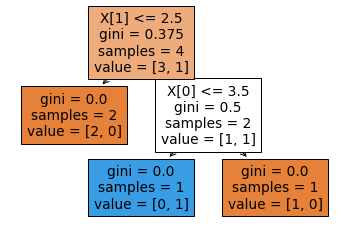

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

X = np.array(([1, 1], [2, 4], [5, 1], [5, 4]), dtype=float)
y = np.array([1, 2, 1, 1])
dt = DecisionTreeClassifier().fit(X, y)
plot_tree(dt, filled=True);